<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 유방암 데이터를 통한 앙상블 실습
  </h2>
</div>


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## Voting 예제

In [16]:
cancer = load_breast_cancer() # 데이터를 불러옴 
# 데이터를 프레임으로 만듬 
cancer_df = pd.DataFrame(data=cancer.data,
                         columns=cancer.feature_names)
# Y label == target 
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Pipeline 

1. EDA (데이터탐색) 
2. preprocessing (전처리); 컬럼을 삭제 결측치를 보간
열의 타입을 바꿈 ( object ---> int or float) X,y 
3. 모델을 학습 (앙상블)
4. 모델결과 확인 

## EDA

In [17]:
cancer_df.target.unique()
# 분류문제... 

array([0, 1])

In [18]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
# object 이 없다. ---> one-hot encoding 이 필요 없겠다. 

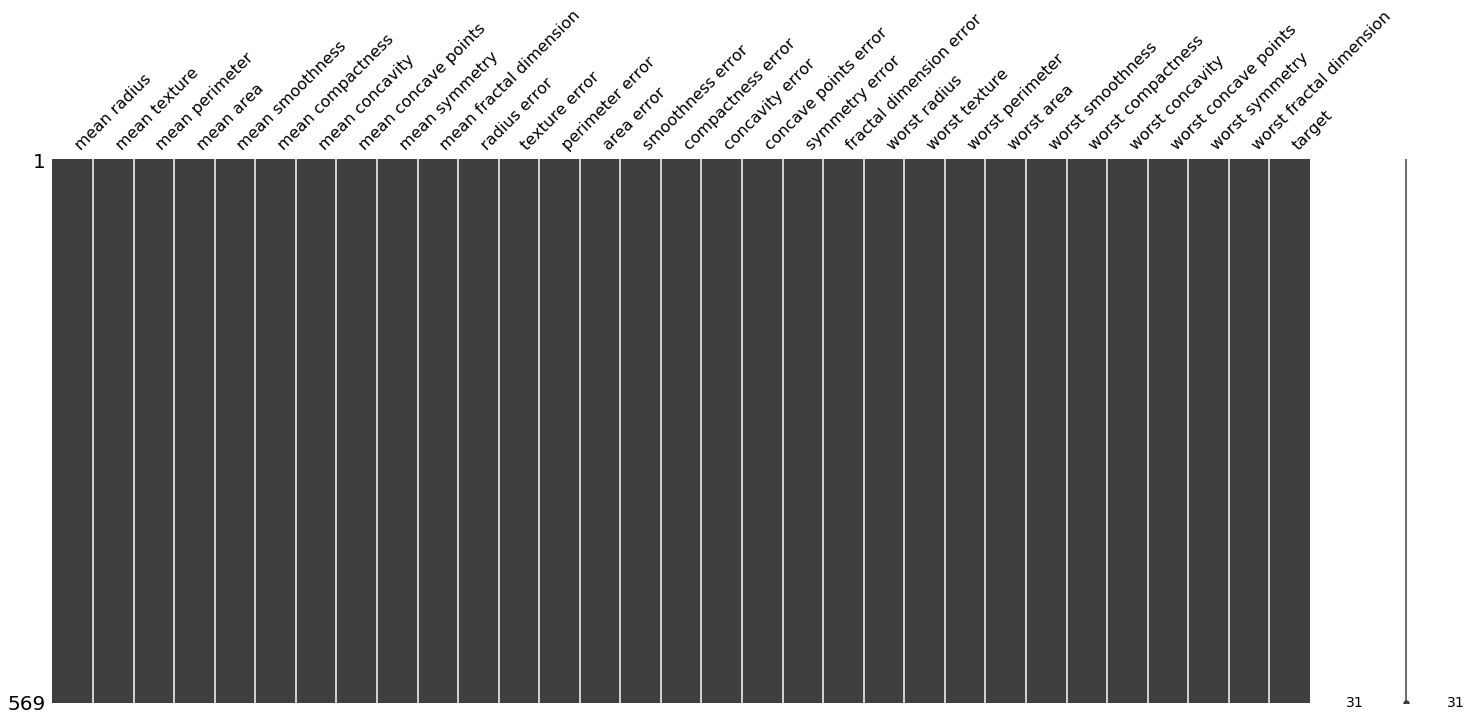

In [22]:
import missingno as msno 

msno.matrix(cancer_df)

In [23]:
X = cancer.data
y = cancer.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, # cancer_df.iloc[:,:-1] 혹은 cancer_df.drop('target',axis=1)
                                                    y, # cancer_df.target
                                                    test_size=0.3,
                                                   random_state=42)

## model training 

### Voting_hard

In [ ]:
# voting을 도와주는 패키지 
from sklearn.ensemble import VotingClassifier

# 보팅에 사용될 모델 총 3개의 분류모델 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 

In [25]:
# VotingClassifier에 추가할 개별 학습 모델(분류기, estimator) 생성
svm_clf = SVC(gamma='scale')
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression(solver='lbfgs',max_iter=10000)

In [27]:
# VotingClassifier 객체 생성
# hard : 다수결 & soft: 평균 
voting_clf = VotingClassifier([('Support Vector Machine',svm_clf),
                               ('Decision Tree Classifier',dt_clf),
                               ('Logistic Regression',lr_clf)],
                              voting='hard') # voting method soft of hard 

In [28]:
# fit method== 학습 
# 개별로 학습하지 않고 앙상블분류기를 학습 . 
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('Support Vector Machine',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_wei...
                                                     random_state=None,
                                                     splitter='best')),
                             ('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                        

In [11]:
# y_pred = voting_clf.predict(X_test)
# score 를 사용하면 바로 점수를 도출합니다. 
voting_clf.score(X_test,y_test)
# accuracy 97% 
# 분류모델의 평가기준: accuracy, F1, recall, precision 

0.9707602339181286

In [29]:
# 머신러닝 장점: 결과를 역추적 할 수있다. 
# 각각 개별 분류기의 정확도 확인
for i,clf in enumerate(voting_clf.estimators_):
    print('\n')
    print('{:^30}'.format(voting_clf.estimators[i][0]))
    print()
    print('{:<5} : {}'.format('TRAIN',clf.score(X_train,y_train)))
    print('{:<5} : {}'.format('TEST',clf.score(X_test,y_test)))



    Support Vector Machine    

TRAIN : 0.8994974874371859
TEST  : 0.935672514619883


   Decision Tree Classifier   

TRAIN : 1.0
TEST  : 0.9415204678362573


     Logistic Regression      

TRAIN : 0.9597989949748744
TEST  : 0.9766081871345029


## Voting_soft

In [ ]:
# VotingClassifier에 추가할 개별 학습 모델(분류기, estimator) 생성
svm_clf = SVC(gamma='scale',probability=True)
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression(solver='lbfgs',max_iter=10000)

In [ ]:
# VotingClassifier 객체 생성
# hard : 다수결 
# soft: 평균 
voting_clf = VotingClassifier([('Support Vector Machine',svm_clf),
                               ('Decision Tree Classifier',dt_clf),
                               ('Logistic Regression',lr_clf)],
                              voting='soft') # voting method soft of hard 

In [ ]:
# fit method== 학습 
# 개별로 학습하지 않고 앙상블분류기를 학습 . 
# STMOE oversampling결과로 모델 트레이닝 
voting_clf.fit(X_train_over ,y_train_over )

In [ ]:
# y_pred = voting_clf.predict(X_test)
# score 를 사용하면 바로 점수를 도출합니다. 
voting_clf.score(X_test,y_test)
# accuracy 97% 
# 분류모델의 평가기준: accuracy, F1, recall, precision 

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 다른 모델 보팅 해보기 
  </h2>
</div>

- 보팅에 사용될 모델 총 3개의 분류모델 

```python 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
```